In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')


169001437/169001437 [==============================] - 3s 0us/step


In [5]:
#normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
###class_names = {
'aquatic_mammals':	['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish':	['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers':	['orchids', 'poppies', 'roses', 'sunflowers', 'tulips'],
'food_containers':	['bottles', 'bowls', 'cans', 'cups', 'plates'],
'fruit_and_vegetables':	['apples', 'mushrooms', 'oranges', 'pears', 'sweet_peppers'],
'household_electrical_devices':	['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'],
'household_furniture':	['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects':	['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large_carnivores':	['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large_manmade_outdoor_things':	['bridge', 'castle', 'house', 'road', 'skyscraper'],
'large_natural_outdoor_scenes':	['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large_omnivores_and_herbivores':	['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
'medium_sized_mammals':	['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non_insect_invertebrates':	['crab', 'lobster', 'snail', 'spider', 'worm'],
'people':	['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles':['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small_mammals':	['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees':	['maple', 'oak', 'palm', 'pine', 'willow'],
'vehicles_1':	['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles_2':	['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
                }

SyntaxError: ignored

In [7]:
class_names=['aqua_mammals' ,'fish','flowers'	,'food_containers'	,'fruit and vegetables',	'electrical_devices',
             'household furniture',	'insects'	,'carnivores'	,'man-made outdoor things',	'natural outdoor scenes',
             'omnivores & herbivores',	'medium-sized mammals',	'non-insect invertebrates',	'people',
             'reptiles',	'small mammals',	'trees',	'vehicles 1','vehicles 2']

In [8]:
train_images.shape

(50000, 32, 32, 3)

In [9]:
len(train_labels)

50000

In [10]:
test_images.shape

(10000, 32, 32, 3)

In [11]:
len(test_labels)

10000

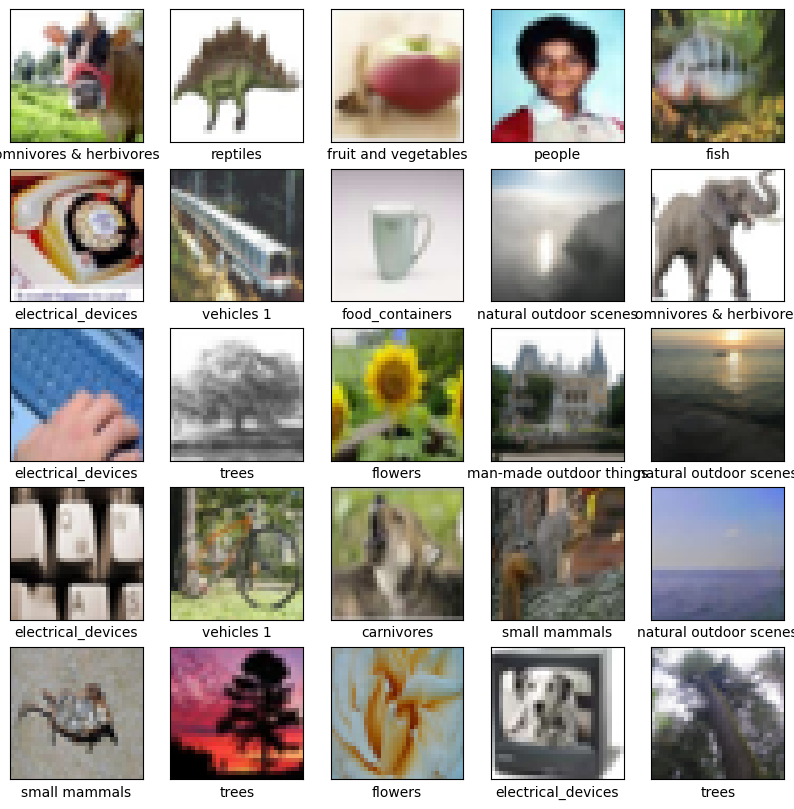

In [12]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [15]:
model.add(layers.Flatten())#input layer
model.add(layers.Dense(64, activation='relu'))#hidden layer
model.add(layers.Dense(20))#output layer

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 2.4451 - accuracy: 0.2398
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0506 - accuracy: 0.3646
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8655 - accuracy: 0.4175
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7476 - accuracy: 0.4539
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6644 - accuracy: 0.4809
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5935 - accuracy: 0.4994
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5368 - accuracy: 0.5157
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4758 - accuracy: 0.5333
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4248 - accuracy: 0.5480
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3

In [18]:
#Accuracy on test data :
test_loss, test_accu = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.7325 - accuracy: 0.4694


In [19]:
#Accuraccy on training data:
train_loss, train_accu = model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 5s 3ms/step - loss: 1.3232 - accuracy: 0.5759


In [20]:
pred = model.predict(test_images)
pred[0]

313/313 [==============================] - 1s 2ms/step


array([ 1.3794723 , -2.9846187 , -4.0134964 , -4.3244066 , -4.435991  ,
       -0.27642247, -1.4848393 , -0.13735753, -0.5804802 ,  0.3841896 ,
       -1.1712266 , -0.83431065,  2.3287153 ,  0.10812338, -0.705102  ,
        0.58485556, -0.3144586 , -2.045663  , -0.31109154, -0.07444882],
      dtype=float32)

In [21]:
np.argmax(pred[0])

12

In [22]:

test_labels[0]

array([10])

In [23]:
#2nd model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(20))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 128)        

In [25]:
model.compile(optimizer='adam',
               loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 2.5772 - accuracy: 0.1887
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2001 - accuracy: 0.3107
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9556 - accuracy: 0.3871
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7779 - accuracy: 0.4413
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6406 - accuracy: 0.4826
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5289 - accuracy: 0.5145
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4213 - accuracy: 0.5471
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3322 - accuracy: 0.5724
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2455 - accuracy: 0.5988
Epoch 10/10
1563/1563 [==============================] - 10s 7ms/step - lo

In [27]:
#Testing accuracy:
test_loss, test_accu = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.7124 - accuracy: 0.5029


In [28]:
#Training Accuracy
train_loss, train_accu = model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.9912 - accuracy: 0.6770


In [29]:
pred = model.predict(test_images)
pred[0]

313/313 [==============================] - 1s 2ms/step


array([ 1.5461403 ,  0.00911514, -2.7503994 , -3.311257  , -5.3385224 ,
       -1.5865366 , -2.8170652 , -2.0578601 , -1.8423647 ,  0.67626256,
       -1.1832529 , -0.9054409 , -2.3756948 , -0.33665878, -0.7342464 ,
       -0.2647934 , -2.2047875 , -0.8871976 ,  1.0554074 ,  0.65711784],
      dtype=float32)

In [30]:
np.argmax(pred[0])

0

In [31]:
test_labels[0]

array([10])

In [32]:

#now with the help of tuning
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.8 MB/s eta 0:00:00


In [33]:
from keras import layers
from keras.layers import BatchNormalization
from keras import regularizers

def model_builder(hp):
  model = keras.Sequential()
  #adding input layer
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(keras.layers.Flatten())

  #tune the no of units in the first Dense Layer
  #choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512)
  model.add(keras.layers.Dense(units=hp_units, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  #model.add(BatchNormalization())   #updated
  model.add(keras.layers.Dropout(0.5))  #updated

  model.add(keras.layers.Dense(20)) #output layer

  #tune the learning rate for the optimizer
  #choose an ptimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [34]:
tuner = kt.Hyperband(model_builder,objective='val_accuracy',
                   max_epochs=10,
                   factor=4,overwrite=True,
                   directory='my_dir',
                   project_name='intro_to_kt')

In [35]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [36]:
tuner.search(train_images,train_labels,epochs=50,validation_split=0.2,callbacks=[stop_early])

Trial 11 Complete [00h 02m 26s]
val_accuracy: 0.2806999981403351

Best val_accuracy So Far: 0.32409998774528503
Total elapsed time: 00h 10m 07s


In [37]:
#Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.get('units'))
print(best_hps.get('learning_rate'))

423
0.0001


In [38]:
model = tuner.hypermodel.build(best_hps)
newmodel = model.fit(train_images,train_labels, epochs=50, validation_split=0.2)

val_acc_per_epoch = newmodel.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch))+1
print('Best epoch: %d'%(best_epoch,))

Epoch 1/50
1250/1250 [==============================] - 14s 10ms/step - loss: 3.4665 - accuracy: 0.1798 - val_loss: 2.6643 - val_accuracy: 0.2530
Epoch 2/50
1250/1250 [==============================] - 14s 11ms/step - loss: 2.6765 - accuracy: 0.2255 - val_loss: 2.5708 - val_accuracy: 0.2686
Epoch 3/50
1250/1250 [==============================] - 8s 7ms/step - loss: 2.6148 - accuracy: 0.2424 - val_loss: 2.5245 - val_accuracy: 0.2848
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5840 - accuracy: 0.2488 - val_loss: 2.5103 - val_accuracy: 0.2961
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5544 - accuracy: 0.2635 - val_loss: 2.4788 - val_accuracy: 0.3024
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5307 - accuracy: 0.2724 - val_loss: 2.4646 - val_accuracy: 0.3049
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5099 - accuracy: 0.2794 - val_loss: 2.4267 - val_accur

In [39]:
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(train_images, train_labels, epochs=best_epoch, validation_split=0.2, validation_data=(test_images,test_labels))

Epoch 1/43
1563/1563 [==============================] - 14s 8ms/step - loss: 3.3874 - accuracy: 0.1683 - val_loss: 2.6562 - val_accuracy: 0.2505
Epoch 2/43
1563/1563 [==============================] - 12s 8ms/step - loss: 2.6639 - accuracy: 0.2167 - val_loss: 2.5537 - val_accuracy: 0.2628
Epoch 3/43
1563/1563 [==============================] - 11s 7ms/step - loss: 2.6045 - accuracy: 0.2354 - val_loss: 2.5076 - val_accuracy: 0.2729
Epoch 4/43
1563/1563 [==============================] - 12s 8ms/step - loss: 2.5664 - accuracy: 0.2479 - val_loss: 2.4870 - val_accuracy: 0.2856
Epoch 5/43
1563/1563 [==============================] - 12s 8ms/step - loss: 2.5397 - accuracy: 0.2567 - val_loss: 2.4505 - val_accuracy: 0.2936
Epoch 6/43
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5181 - accuracy: 0.2627 - val_loss: 2.4374 - val_accuracy: 0.3051
Epoch 7/43
1563/1563 [==============================] - 12s 7ms/step - loss: 2.5027 - accuracy: 0.2728 - val_loss: 2.4363 - val_ac

In [40]:
eval_result = hypermodel.evaluate(test_images,test_labels)
print('[test_loss, test_accuracy]:',eval_result)

313/313 [==============================] - 1s 3ms/step - loss: 2.2397 - accuracy: 0.3809
[test_loss, test_accuracy]: [2.2397420406341553, 0.38089999556541443]


In [41]:
pred = hypermodel.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [42]:

np.argmax(pred[0])

19

In [43]:

test_labels[0]

array([10])

In [44]:

pred[10]

array([-1.7231572 , -0.51100916, -1.3489861 ,  1.7296549 , -2.1403298 ,
        1.937841  ,  0.75914365, -3.8997822 , -0.99483573, -0.85764104,
       -1.0085999 , -0.88332856, -0.7281217 , -1.2209764 ,  0.01343076,
       -1.1684694 , -0.03976828, -5.128137  , -1.0051963 , -2.0869298 ],
      dtype=float32)

In [45]:
np.argmax(pred[10])

5

In [46]:
test_labels[10]

array([10])